## For Temperature Prediction----> Multiple Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1.Importing Weather Dataset

In [6]:
df= pd.read_csv(r"C:\ML\Kolkata_weather_data(2017-2022).csv")
df.head(3)

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


## 2.Data Preprocessing

### 2.1 Data cleaning

Address                   0
Date time                 0
Minimum Temperature       0
Maximum Temperature       0
Temperature               0
Dew Point                 0
Relative Humidity         0
Heat Index              340
Wind Speed                0
Wind Gust              2100
Wind Direction            0
Wind Chill             2178
Precipitation             0
Precipitation Cover       0
Snow Depth              365
Visibility                0
Cloud Cover               0
Sea Level Pressure        1
Weather Type              1
Latitude                  0
Longitude                 0
Resolved Address          0
Name                      0
Info                   2191
Conditions                0
dtype: int64


<Axes: >

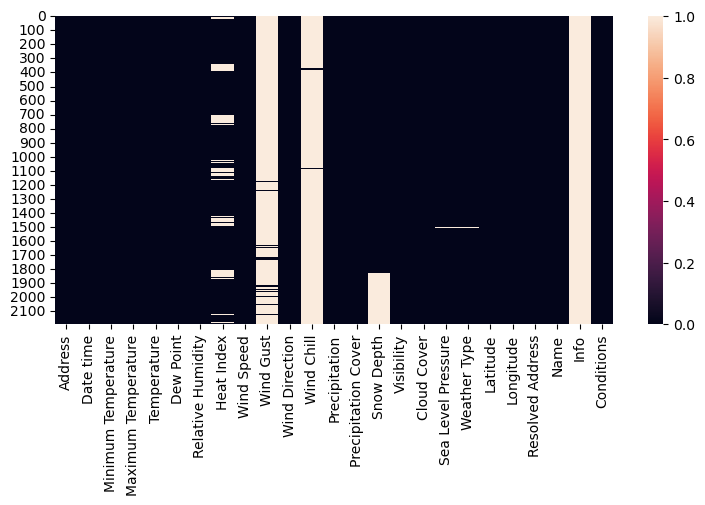

In [9]:
print(df.isna().sum())
null_value=df.isna()
plt.figure(figsize=(9,4))
sns.heatmap(null_value)

### 2.2 Feature Selection

In [11]:
a=df[['Wind Speed','Visibility','Cloud Cover'	,'Sea Level Pressure','Precipitation','Relative Humidity','Temperature']]
a=a.dropna()
print(a.isna().sum())

Wind Speed            0
Visibility            0
Cloud Cover           0
Sea Level Pressure    0
Precipitation         0
Relative Humidity     0
Temperature           0
dtype: int64


<Axes: >

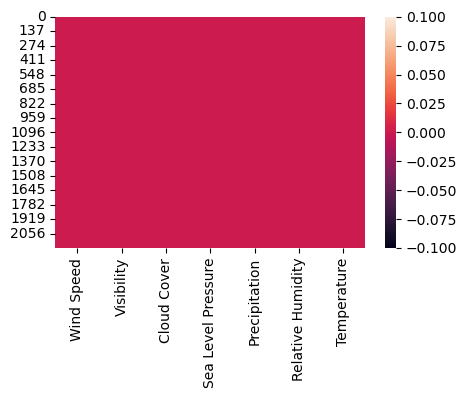

In [12]:
nan_values= a.isna()
plt.figure(figsize=(5,3))
sns.heatmap(nan_values)

### 2.3 Data Normalization

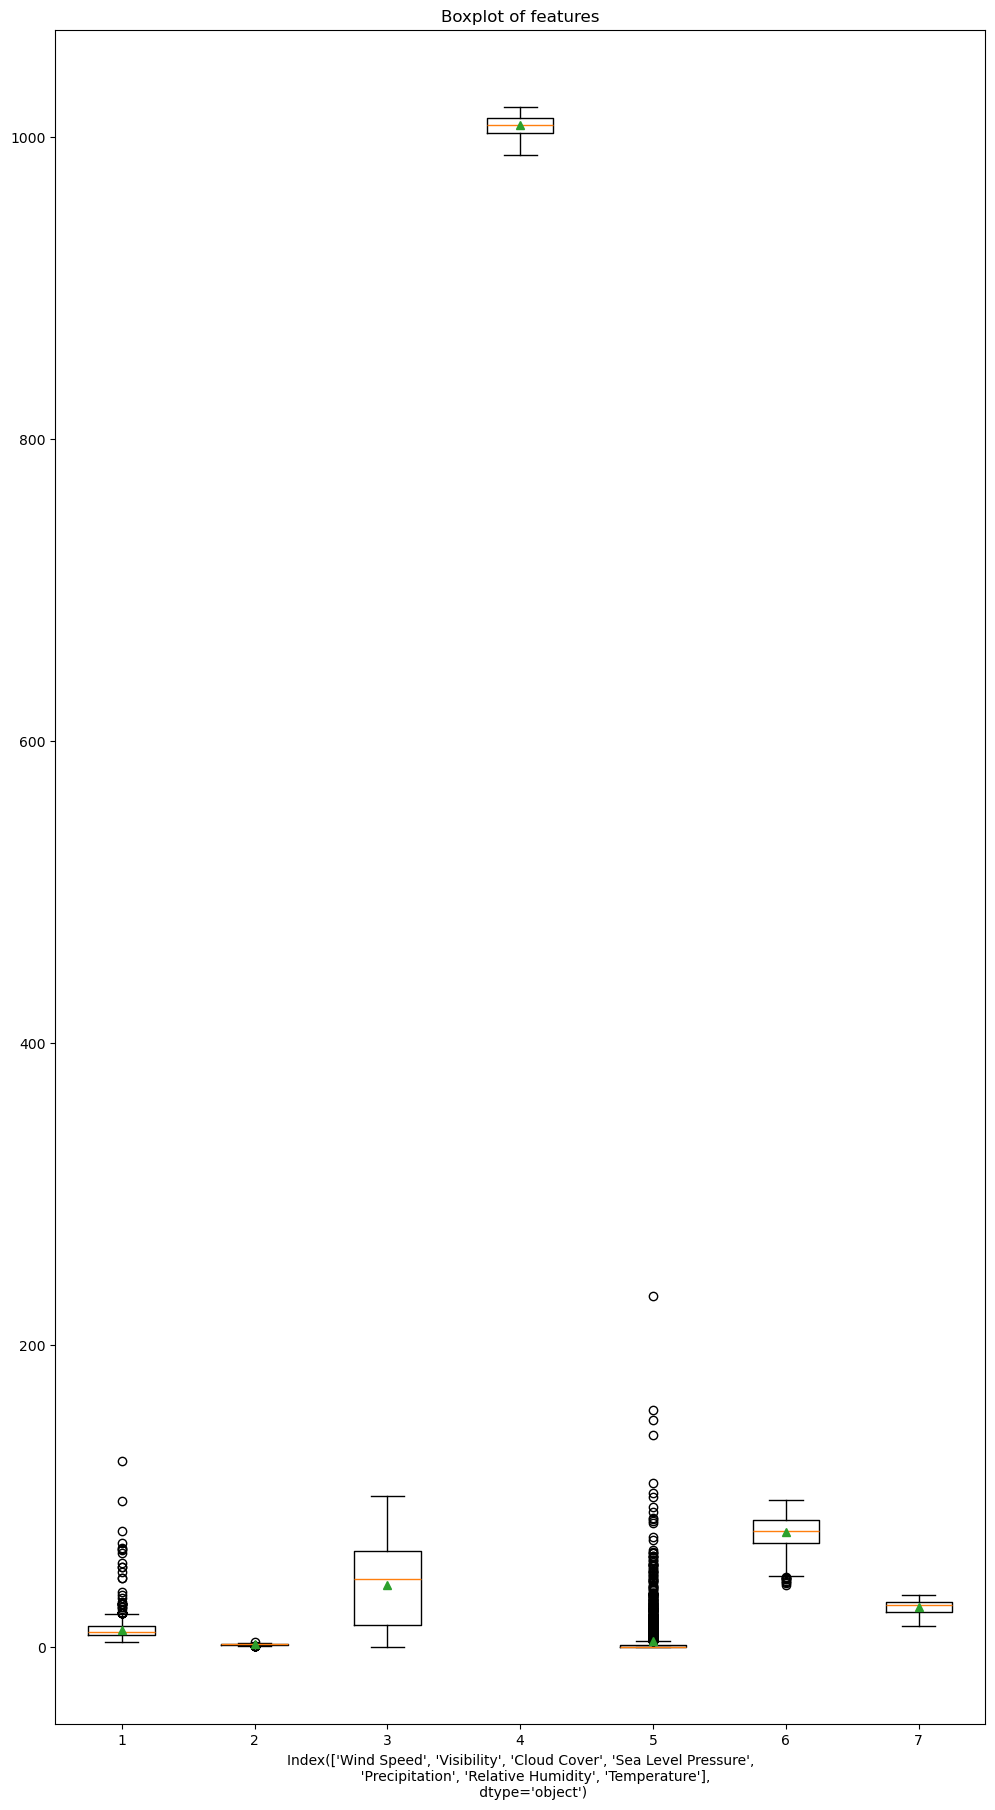

In [14]:
plt.figure(figsize=(12,22))
plt.boxplot(a, showmeans=True)
plt.xlabel(a.columns)
plt.title("Boxplot of features")
plt.show()

In [15]:
# conclusion: The sea level Pressure is not scaled(having higher values than other features)

<Figure size 200x300 with 0 Axes>

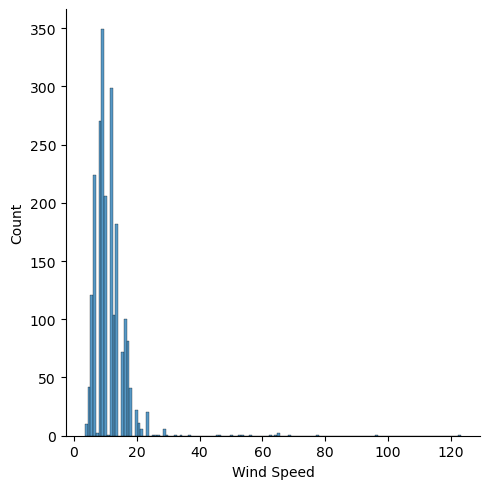

,Wind Speed,Visibility,Cloud Cover,Sea Level Pressure,Precipitation,Relative Humidity,Temperature
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,11.274977,2.022968,41.436667,1007.768219,4.494320,76.305256,26.678676
std,6.164095,0.334518,27.926322,5.949442,13.271045,10.247424,4.416252
min,3.400000,0.700000,0.000000,988.400000,0.000000,41.150000,14.200000
25%,8.100000,1.800000,14.900000,1003.000000,0.000000,69.080000,23.600000
50%,10.300000,2.100000,45.150000,1007.900000,0.000000,77.100000,28.300000
75%,13.900000,2.300000,63.600000,1012.800000,1.677500,84.225000,30.000000
max,123.300000,3.200000,100.000000,1019.700000,232.770000,97.230000,34.800000


In [16]:
plt.figure(figsize=(2,3))
sns.displot(a['Wind Speed'])
plt.show()
a.describe()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()
ss.fit(a[['Sea Level Pressure']])

StandardScaler()

In [19]:
a['Scaled SLP'] = pd.DataFrame(ss.transform(a[['Sea Level Pressure']]))
a.head(3)

,Wind Speed,Visibility,Cloud Cover,Sea Level Pressure,Precipitation,Relative Humidity,Temperature,Scaled SLP
0,5.8,1.2,4.9,1015.9,0.0,82.47,19.9,1.367126
1,8.1,1.4,0.3,1015.6,0.0,76.76,20.6,1.316690
2,9.2,1.6,10.7,1014.7,0.0,73.12,21.1,1.165380


In [20]:
a=a.drop('Sea Level Pressure',axis=1)
a.head()
a=a.dropna()
#the sea level pressure got scaled and the modified value is saved in scaled slp

<Figure size 500x500 with 0 Axes>

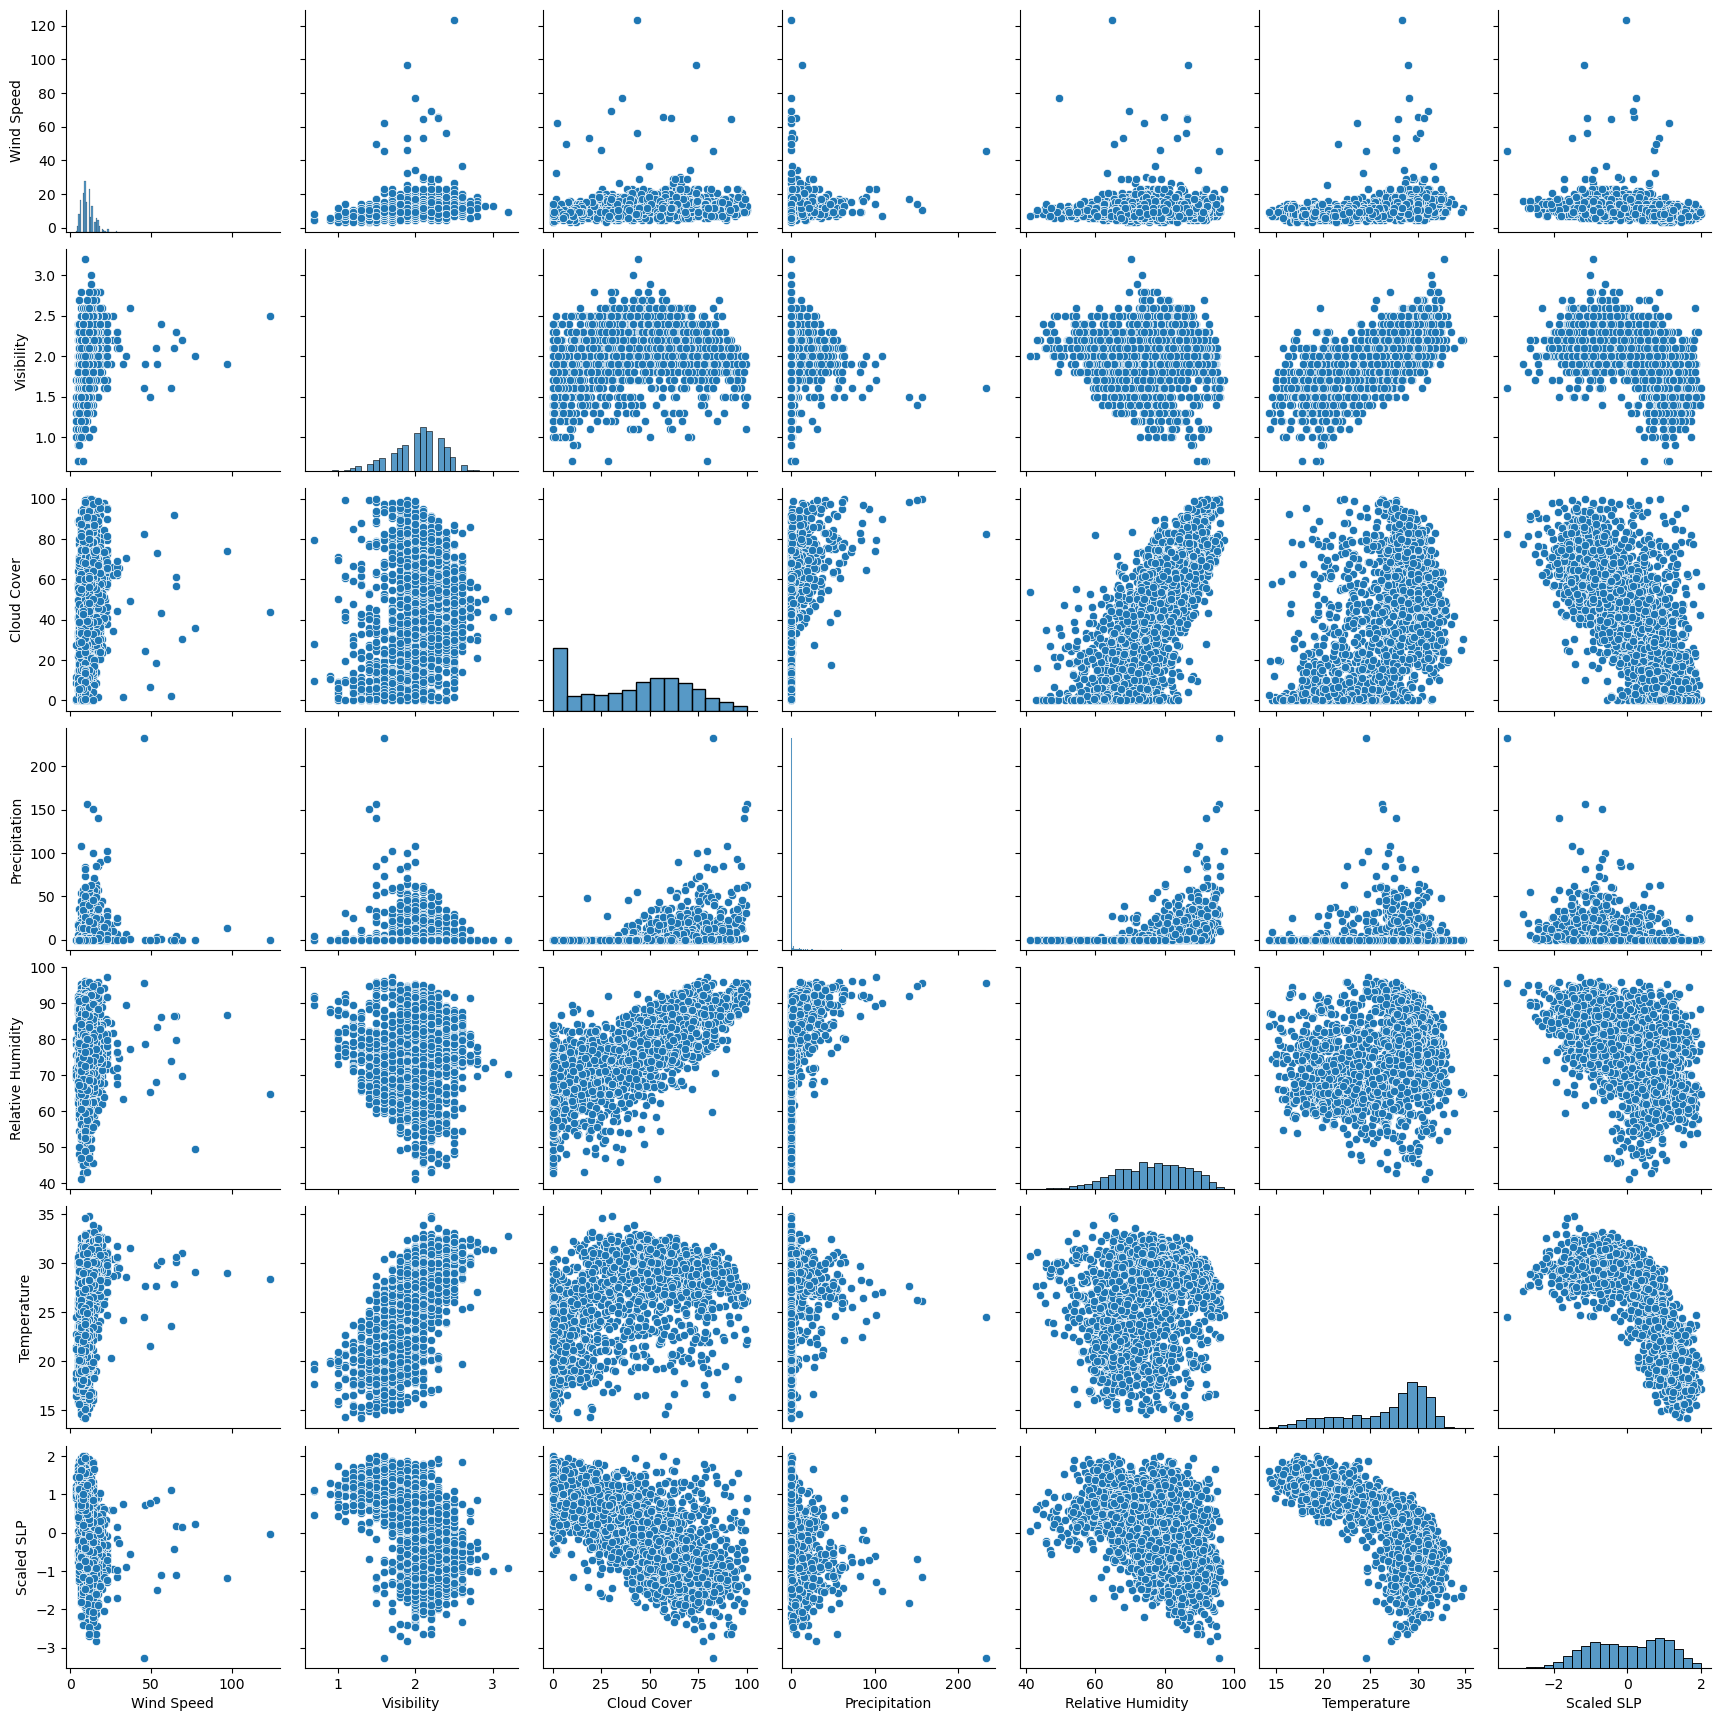

In [21]:
plt.figure(figsize=(5,5))
sns.pairplot(data=a)
plt.show()
#types of correlation as compared with temperature in column 7.

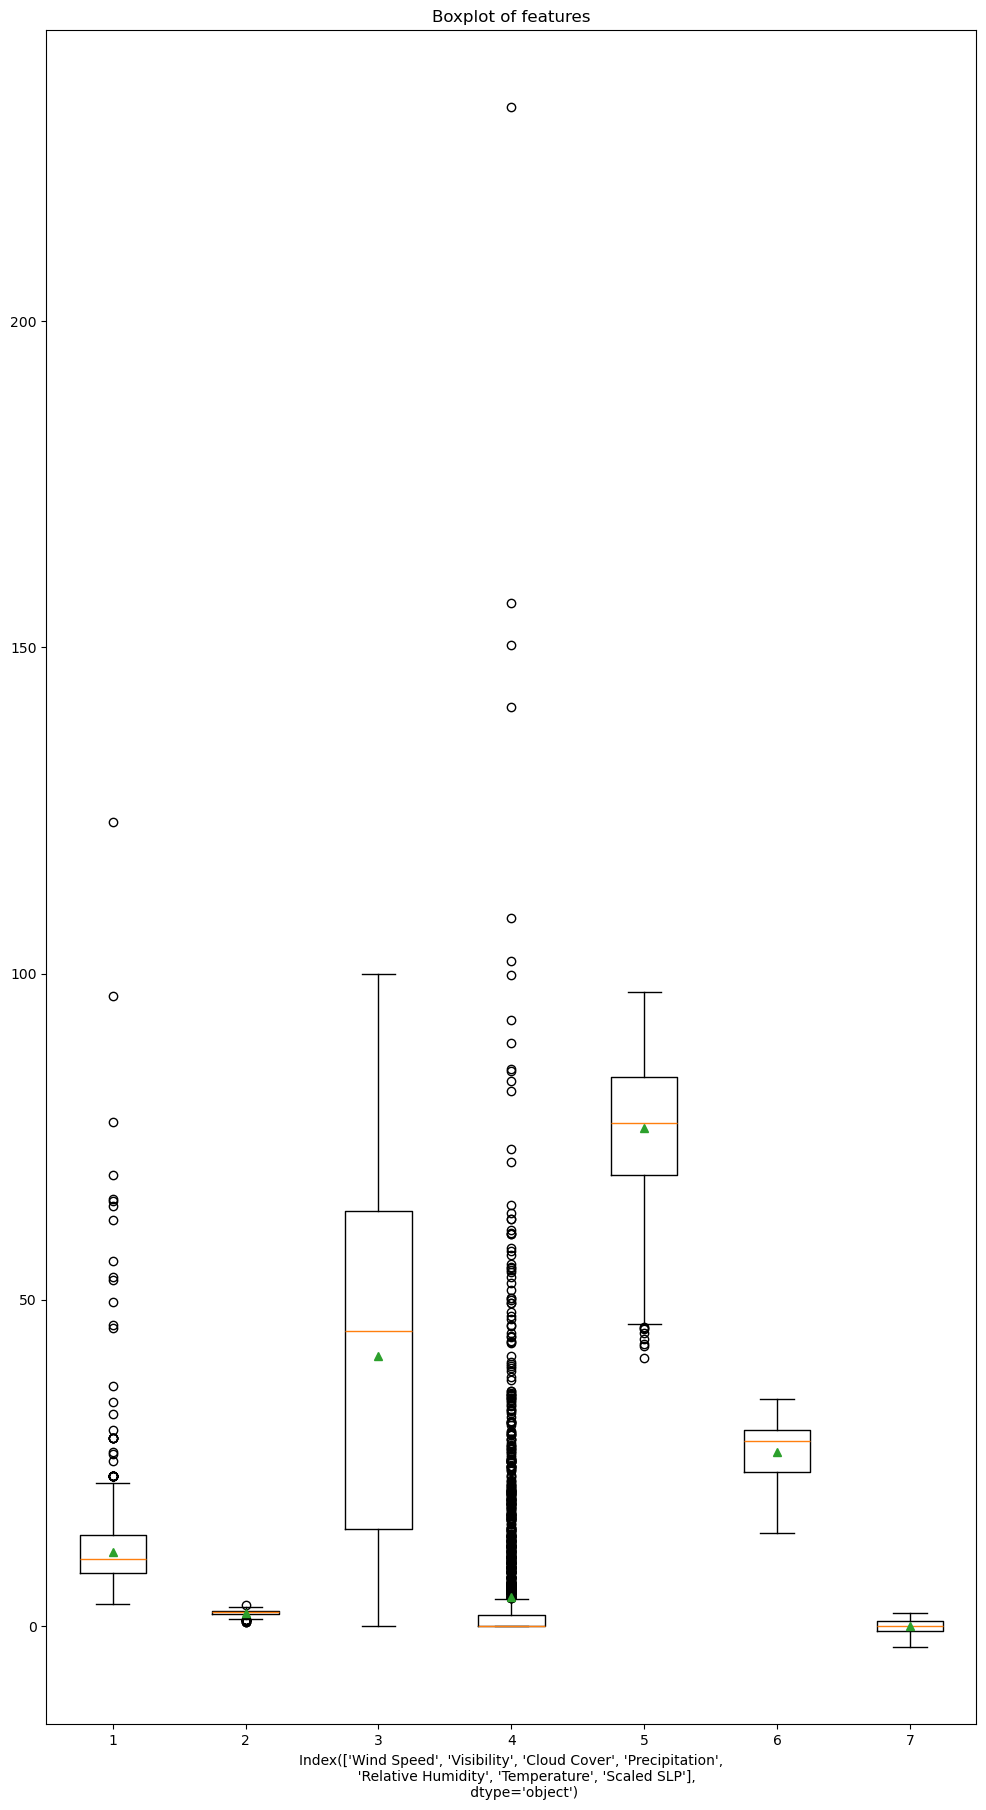

In [22]:
plt.figure(figsize=(12,22))
plt.boxplot(a, showmeans=True)
plt.xlabel(a.columns)
plt.title("Boxplot of features")
plt.show()

<Axes: >

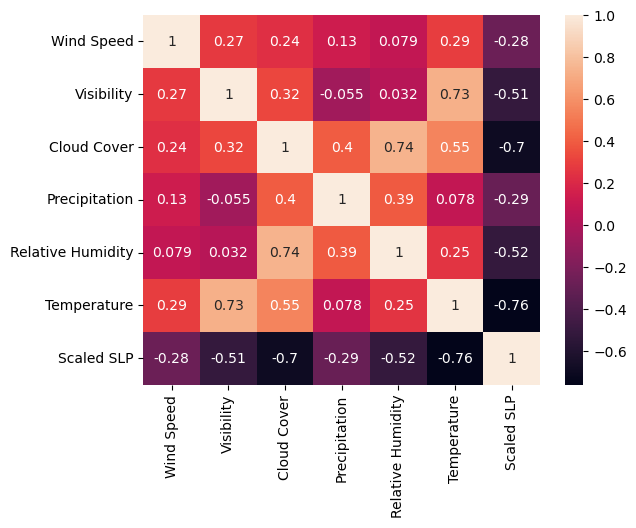

In [23]:
sns.heatmap(data=a.corr(),annot=True)

In [24]:
# here features like visibility and cloud cover is  positively correlated with temperature.

### 2.5 Outlier detection and Removal

In [26]:
#both precipitation and wind speed are having outliers(see boxplot diagram above)

In [27]:
q1=a['Precipitation'].quantile(0.25)
q3=a['Precipitation'].quantile(0.75)
iqr=q3-q1
min_range= q1-1.5*iqr
max_range= q3+1.5*iqr
print(min_range)
print(max_range)

-2.52
4.2


(1756, 7)


Text(0.5, 1.0, 'After Removing Outliers')

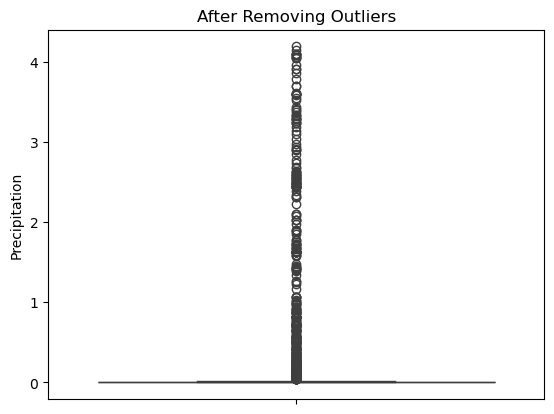

In [28]:
a=a[(a['Precipitation']<=max_range) & (a['Precipitation']>=min_range)]
print(a.shape)
sns.boxplot(y=a['Precipitation'])
plt.title('After Removing Outliers')

In [29]:
q1=a['Wind Speed'].quantile(0.25)
q3=a['Wind Speed'].quantile(0.75)
iqr=q3-q1
min_range= q1-1.5*iqr
max_range= q3+1.5*iqr
print(min_range)
print(max_range)

1.049999999999998
19.85


(1717, 7)


Text(0.5, 1.0, 'After Removing Outliers')

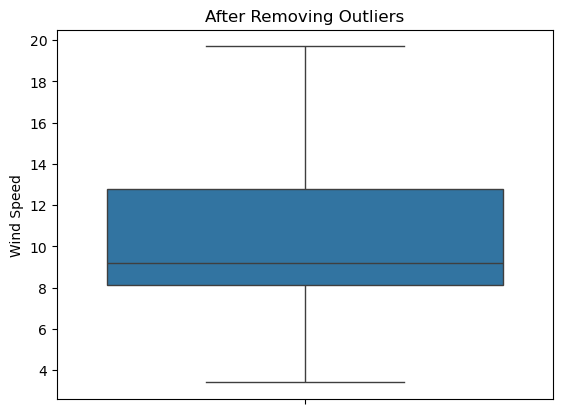

In [30]:
a=a[(a['Wind Speed']<=max_range) & (a['Wind Speed']>=min_range)]
print(a.shape)
sns.boxplot(y=a['Wind Speed'])
plt.title('After Removing Outliers')

## 3.Dividing dataset into Test and Train Data

In [32]:
x=a[list(a.drop(columns='Temperature'))] #dropping the temperature column because we want to predict temperature.
y=a.Temperature

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [35]:

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions
y_predicted = model.predict(x_test_scaled)
print(y_test, y_predicted)

749     18.0
1719    29.4
125     31.8
148     29.3
414     24.2
        ... 
1507    24.5
115     31.9
1263    29.7
2170    23.3
1741    30.9
Name: Temperature, Length: 344, dtype: float64 [20.71491537 29.57771782 28.33613284 31.45744213 24.35524531 29.72634733
 28.01822251 25.21065058 24.09695269 22.38362739 24.90857151 26.17272855
 20.90991319 26.16158698 26.10730494 25.77320694 22.2524903  32.49974387
 29.77630982 20.40084691 21.55618545 25.4005411  32.18063391 23.35366916
 29.7938176  28.10933004 27.89048466 26.04126573 20.25991894 19.40495539
 31.04839268 25.40576082 28.78159011 25.27458071 30.52687928 18.76418146
 30.54474936 30.10889177 28.6890932  31.42605042 28.24574584 26.55775499
 21.28237013 20.61979645 18.51405937 31.29893651 28.54191526 21.90466863
 22.01507163 29.61961933 31.10447248 29.02290325 30.50667892 21.2819512
 31.73909209 29.63540419 28.59644292 28.72323824 23.31109979 24.18606671
 30.4682069  27.69785403 26.71549715 22.60032017 24.13577599 22.38860176
 19.7745

Temprature prediction Accuracy=  77.3860689988804


[]

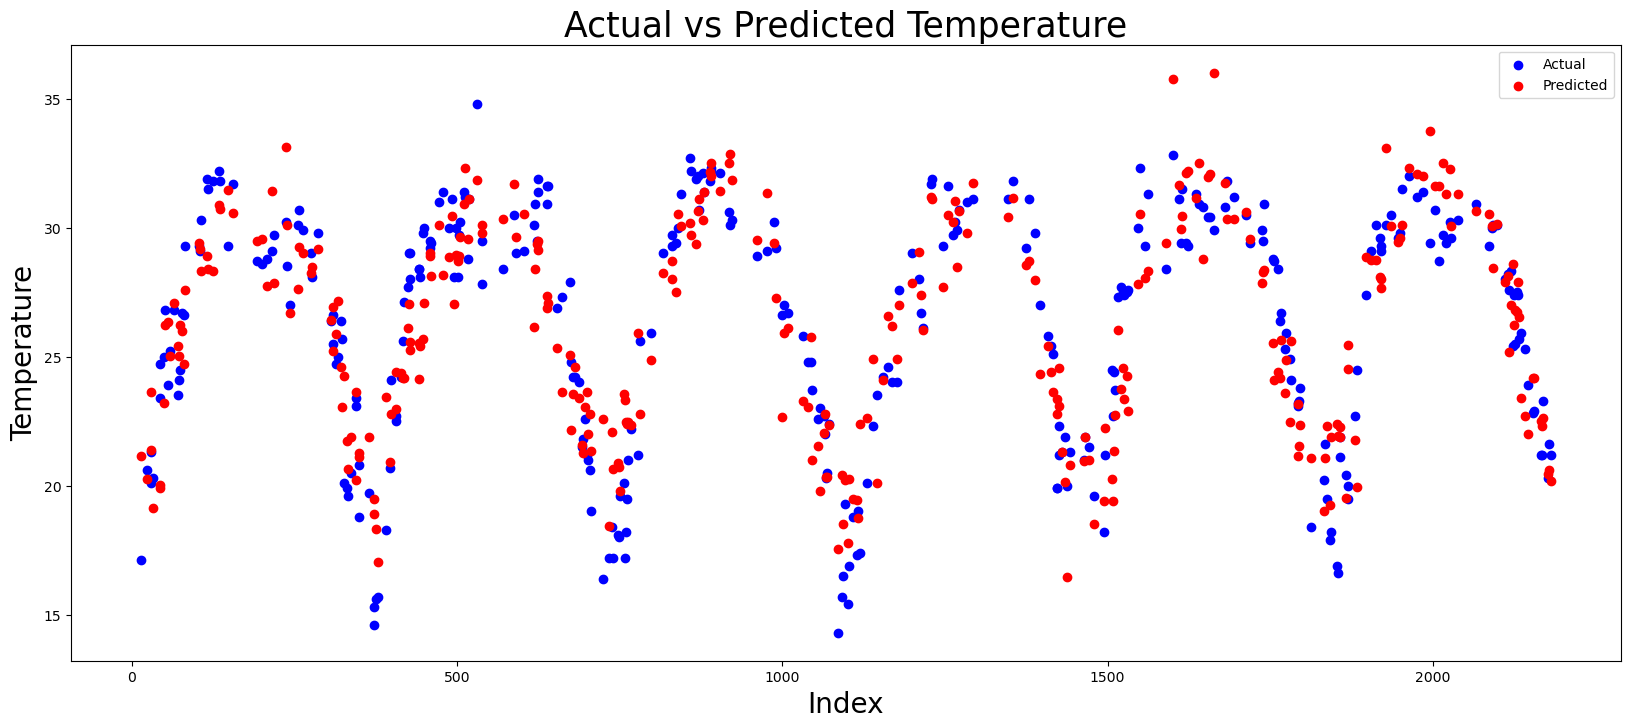

In [36]:
plt.figure(figsize=(20,8))
score= r2_score(y_test,y_predicted)
print("Temprature prediction Accuracy= ",score*100)
plt.scatter(x_test.index, y_test, color='blue', label='Actual')
plt.scatter(x_test.index, y_predicted, color='red', label='Predicted')

plt.xlabel('Index',fontsize=20)
plt.ylabel('Temperature',fontsize=20)
plt.legend()
plt.title('Actual vs Predicted Temperature',fontsize=25)
plt.plot()

# Support Vector Machine Algorithm

In [38]:
x=a[list(a.drop(columns='Temperature'))]
y=a.Temperature

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state= 42)

In [40]:
'linear','poly','rbf','sigmoid'

('linear', 'poly', 'rbf', 'sigmoid')

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [42]:
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)

SVR(kernel='linear')

In [43]:
sv.score(x_test, y_test)*100

76.5896595809173

In [1]:
print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

NameError: name 'model' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x=a[list(a.drop(columns='Temperature'))] #dropping the temperature column because we want to predict temperature.
y=a.Temperature

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

In [ ]:
print(x_test_poly.shape)
print(y_test.shape)
print(y_pred_poly.shape)

In [ ]:
plt.figure(figsize=(20,8))
score= r2_score(y_test,y_pred_poly)
print("Temprature prediction Accuracy= ",score*100)
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test_poly, y_pred_poly, color='red', label='Predicted')

plt.xlabel('Index',fontsize=20)
plt.ylabel('Temperature',fontsize=20)
plt.legend()
plt.title('Actual vs Predicted Temperature',fontsize=25)
plt.plot()